<a href="https://colab.research.google.com/github/Yasna79/Challenge-Telecom-X_Alura_latam/blob/main/Telecom_Latam0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Telecom X es una empresa de telecomunicaciones que está enfrentando un alto índice de evasión de clientes y aún no han identificado el problema de esta evasión. Para ello, han proporcionado algunos datos que deberàn ser explorados, tranformados y luego entregarlos al equipo de ciencia de datos, quienes realizaràn un análisis predictivo y determinaràn de dónde proviene esta evasión de clientes.**
##**El desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de este análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.**


###**¿Qué practicar?**
##**✅ Importar y manipular datos desde una API de manera eficiente.**
##**✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.**
##**✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.**
##**✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes**

In [637]:
import requests
import pandas as pd
import json
import numpy as np

##**📌 Extracción(E - Extract)**

In [638]:
Churn_de_Clientes = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

In [639]:
df = pd.read_json(Churn_de_Clientes)

In [640]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


####**Viendo informacion del dato**

In [641]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


####**Aqui transformas columnas tipo diccionario en columnas normales**

In [642]:
dict_cols = ['customer', 'phone', 'account','internet']

for col in dict_cols:
    expanded = pd.json_normalize(df[col])
    df = pd.concat([df.drop(col, axis=1), expanded], axis=1)


####**Mostrando el dato en forma aleatoria**

In [643]:
df.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
3020,4193-ORFCL,Yes,Female,1,No,No,1,Yes,No,Month-to-month,...,Mailed check,45.10,45.1,DSL,No,No,No,No,No,No
844,1197-BVMVG,No,Female,1,No,No,4,Yes,Yes,Month-to-month,...,Electronic check,74.45,294.45,Fiber optic,No,No,No,No,No,No
5176,7064-JHXCE,No,Male,0,Yes,Yes,62,Yes,No,Two year,...,Credit card (automatic),20.05,1263.9,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
630,0897-FEGMU,Yes,Female,0,Yes,No,11,Yes,Yes,Month-to-month,...,Electronic check,99.50,1056.95,Fiber optic,No,No,Yes,No,Yes,Yes
2409,3365-SAIGS,No,Female,0,No,No,17,Yes,No,Month-to-month,...,Electronic check,83.55,1329.15,Fiber optic,No,Yes,No,No,Yes,No
5688,7774-OJSXI,Yes,Male,0,No,No,31,Yes,Yes,One year,...,Electronic check,103.45,3066.45,Fiber optic,No,Yes,Yes,No,Yes,Yes
3968,5425-GQTTT,,Male,0,Yes,Yes,68,Yes,Yes,Two year,...,Bank transfer (automatic),24.00,1664.3,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
1361,1965-DDBWU,Yes,Male,0,No,No,16,Yes,Yes,Month-to-month,...,Credit card (automatic),89.05,1448.6,Fiber optic,No,No,No,Yes,No,Yes
5063,6917-IAYHD,No,Male,0,No,Yes,1,No,No phone service,Month-to-month,...,Mailed check,33.60,33.6,DSL,No,Yes,No,Yes,No,No
6308,8676-TRMJS,Yes,Male,0,No,No,3,Yes,Yes,Month-to-month,...,Mailed check,75.00,209.1,Fiber optic,No,No,No,No,No,No


In [644]:
columnas = list(df)
columnas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [645]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   Contract          7267 non-null   object 
 10  PaperlessBilling  7267 non-null   object 
 11  PaymentMethod     7267 non-null   object 
 12  Charges.Monthly   7267 non-null   float64
 13  Charges.Total     7267 non-null   object 
 14  InternetService   7267 non-null   object 
 15  OnlineSecurity    7267 non-null   object 
 16  OnlineBackup      7267 non-null   object 


In [646]:
df.sample(100)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
4419,6048-UWKAL,No,Female,1,Yes,No,69,Yes,Yes,Two year,...,Credit card (automatic),105.40,6998.95,Fiber optic,No,Yes,No,Yes,Yes,Yes
2339,3258-ZKPAI,No,Male,0,Yes,Yes,72,Yes,Yes,Two year,...,Bank transfer (automatic),116.60,8337.45,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes
4043,5536-RTPWK,Yes,Male,0,Yes,No,49,Yes,Yes,Month-to-month,...,Bank transfer (automatic),99.05,4853.75,Fiber optic,No,Yes,No,No,Yes,Yes
6429,8823-RLPWL,No,Female,0,Yes,No,72,Yes,Yes,Two year,...,Credit card (automatic),110.65,8065.65,Fiber optic,Yes,Yes,Yes,No,Yes,Yes
174,0274-JKUJR,No,Male,0,Yes,Yes,7,No,No phone service,Month-to-month,...,Mailed check,58.85,465.7,DSL,Yes,Yes,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6209,8535-SFUTN,No,Male,0,No,No,61,Yes,Yes,Month-to-month,...,Electronic check,106.45,6300.15,Fiber optic,Yes,No,Yes,No,Yes,Yes
57,0096-FCPUF,No,Male,0,No,No,30,Yes,Yes,Month-to-month,...,Mailed check,64.50,1888.45,DSL,Yes,No,No,No,No,Yes
6560,9026-LHEVG,No,Female,0,No,No,9,No,No phone service,Month-to-month,...,Electronic check,40.75,359.4,DSL,No,Yes,No,No,No,Yes
6454,8871-JLMHM,No,Female,0,Yes,No,68,Yes,Yes,Two year,...,Credit card (automatic),90.20,6297.65,Fiber optic,No,Yes,Yes,Yes,No,No


###**Preguntando si hay datos nulos**

In [647]:
df.isna().sum()


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
Contract,0


####**Chequear si hay duplicados**

In [648]:
duplicados = df[df['customerID'].duplicated(keep=False)]
duplicados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies


####**Cambiamos el tipo de variable, el nombre y borramos la antigua**

In [649]:
df['ChargesTotal'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df.drop(columns=['Charges.Total'], inplace=True)

df['ChargesMonthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')
df.drop(columns=['Charges.Monthly'], inplace=True)


In [650]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,DSL,No,Yes,No,Yes,Yes,No,593.30,65.6
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,DSL,No,No,No,No,No,Yes,542.40,59.9
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.9
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,...,Mailed check,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.9


####**Renombrando Columnas**


In [651]:
df.rename(columns={
    'gender': 'Gender',
    'tenure': 'Tenure',
    'customerID': 'CustomerID'
}, inplace=True)



In [652]:
df.head()

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,DSL,No,Yes,No,Yes,Yes,No,593.30,65.6
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,DSL,No,No,No,No,No,Yes,542.40,59.9
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.9
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,...,Mailed check,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.9


####**Creando una nueva Columna y dividiendo cada valor entre 30**

In [653]:
df['DailyCharges'] = df['ChargesMonthly'] / 30



In [654]:
df.sample(100)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
5825,7969-AULMZ,Yes,Female,0,No,No,21,Yes,Yes,Month-to-month,...,Fiber optic,No,No,No,No,Yes,Yes,2119.50,97.35,3.245000
6798,9373-WSLOY,No,Male,1,Yes,No,33,No,No phone service,Month-to-month,...,DSL,No,Yes,Yes,Yes,Yes,No,1750.85,50.00,1.666667
300,0432-CAJZV,No,Male,0,No,No,3,Yes,No,Month-to-month,...,Fiber optic,No,No,No,No,Yes,Yes,237.65,90.70,3.023333
3485,4818-DRBQT,Yes,Male,0,Yes,No,29,Yes,Yes,Month-to-month,...,Fiber optic,No,Yes,No,No,No,No,2265.25,80.15,2.671667
2737,3787-TRIAL,No,Male,0,Yes,Yes,21,No,No phone service,Month-to-month,...,DSL,No,No,No,No,No,No,565.75,26.05,0.868333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,1763-WQFUK,No,Male,0,No,No,3,Yes,No,Month-to-month,...,DSL,No,No,No,Yes,No,No,147.75,50.50,1.683333
5953,8132-YPVBX,No,Female,0,No,No,6,Yes,No,Month-to-month,...,Fiber optic,No,Yes,No,No,No,Yes,514.60,85.95,2.865000
6549,8999-BOHSE,Yes,Female,1,No,No,11,Yes,No,Month-to-month,...,Fiber optic,No,No,No,No,Yes,Yes,1047.70,89.70,2.990000
5371,7336-RLLRH,No,Male,0,Yes,No,27,Yes,Yes,One year,...,DSL,Yes,No,No,Yes,Yes,Yes,2204.35,80.85,2.695000


####**Columnas que deben ser transformadas: sólo las estrictamente "Yes"/"No"**


In [655]:
bin_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Aplicar transformación a binario
for col in bin_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


df[bin_cols].head()

,Partner,Dependents,PhoneService,PaperlessBilling
0,1,1,1,1
1,0,0,1,0
2,0,0,1,1
3,1,0,1,1
4,1,0,1,1


####**Reemplazar "No phone service" por "No" en la columna MultipleLines**


In [656]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df['MultipleLines'].value_counts()



,count
MultipleLines,
No,4202
Yes,3065


####**Transformar "Yes"/"No" a 1/0 en MultipleLines**


In [657]:
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0})

df[['MultipleLines']].head()

,MultipleLines
0,0
1,1
2,0
3,0
4,0


In [658]:
df.Contract.value_counts()

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


####**Reemplazar valores en la columna 'Contract'**


In [659]:
df['Contract'] = df['Contract'].replace({
    'Month-to-month': '1',
    'One year': '2',
    'Two year': '3'})

df['Contract'] = df['Contract'].astype('int64')

df['Contract'].value_counts()


,count
Contract,
1,4005
3,1743
2,1519


In [660]:
df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,2,...,DSL,No,Yes,No,Yes,Yes,No,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,1,...,DSL,No,No,No,No,No,Yes,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,1,...,Fiber optic,No,No,Yes,No,No,No,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,1,...,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,1,...,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,2,...,DSL,Yes,No,No,Yes,No,No,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,1,...,Fiber optic,No,No,No,No,No,Yes,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,1,...,DSL,No,Yes,No,No,No,No,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,3,...,DSL,Yes,No,Yes,Yes,No,Yes,4627.65,67.85,2.261667


####**Columnas que se transformarán: "Sí" → 1, todo lo demás → 0**


In [661]:
colum_to_binary = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in colum_to_binary:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,2,...,DSL,0,1,0,1,1,0,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,1,...,DSL,0,0,0,0,0,1,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,1,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,1,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,1,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,2,...,DSL,1,0,0,1,0,0,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,1,...,Fiber optic,0,0,0,0,0,1,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,1,...,DSL,0,1,0,0,0,0,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,3,...,DSL,1,0,1,1,0,1,4627.65,67.85,2.261667


###**Recorre cada valor de la columna Churn del DataFrame df.**

####**Si el valor es 'Yes' o 'No', lo deja igual.**

####**Si el valor es diferente de 'Yes' o 'No', lo reemplaza con 'N/A'.**


---



In [670]:
df['Churn'] = df['Churn'].apply(lambda x: x if x == 'Yes' or x =='No' else 'N/A')
df


,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,2,...,DSL,0,1,0,1,1,0,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,1,...,DSL,0,0,0,0,0,1,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,1,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,1,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,1,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,2,...,DSL,1,0,0,1,0,0,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,1,...,Fiber optic,0,0,0,0,0,1,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,1,...,DSL,0,1,0,0,0,0,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,3,...,DSL,1,0,1,1,0,1,4627.65,67.85,2.261667


In [672]:
df['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869
N/A,224


In [671]:
df.to_json('Churn_de_Clientes.json', index= False)

##**📊 Carga y análisis(L - Load & Analysis)**

In [718]:
df1=df.groupby('Churn').size().reset_index(name='Total')
df1 = df1.set_index('Churn')
df1


,Total
Churn,
N/A,224
No,5174
Yes,1869


In [681]:
import matplotlib.pyplot as plt
import seaborn as sns


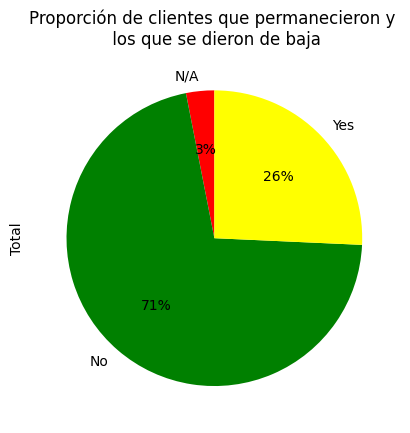

In [719]:
df1['Total'].plot(kind='pie', autopct='%1.f%%', startangle=90, colors=['red', 'green','yellow'])
plt.title('Proporción de clientes que permanecieron y \n los que se dieron de baja')
plt.show()